<>:114: SyntaxWarning: invalid escape sequence '\c'
<>:115: SyntaxWarning: invalid escape sequence '\,'
<>:117: SyntaxWarning: invalid escape sequence '\,'
<>:118: SyntaxWarning: invalid escape sequence '\,'
<>:120: SyntaxWarning: invalid escape sequence '\,'
<>:121: SyntaxWarning: invalid escape sequence '\,'
<>:160: SyntaxWarning: invalid escape sequence '\c'
<>:162: SyntaxWarning: invalid escape sequence '\m'
<>:114: SyntaxWarning: invalid escape sequence '\c'
<>:115: SyntaxWarning: invalid escape sequence '\,'
<>:117: SyntaxWarning: invalid escape sequence '\,'
<>:118: SyntaxWarning: invalid escape sequence '\,'
<>:120: SyntaxWarning: invalid escape sequence '\,'
<>:121: SyntaxWarning: invalid escape sequence '\,'
<>:160: SyntaxWarning: invalid escape sequence '\c'
<>:162: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2696310630.py:114: SyntaxWarning: invalid escape sequence '\c'
  r"$\mathbf{Βέλτιστη\,Ευθεία:}$" + f" $V = {S_slope:.3f} \cdot x - {np.abs(intercept)

--- Πίνακας 1: Ενδεικτικές Πειραματικές Μετρήσεις ---


,AC ΤΑΣΗ ΕΞΟΔΟΥ (Vp-p),ΔΙΑΦΟΡΑ ΦΑΣΗΣ (°)
ΘΕΣΗ ΦΕΡΙΤΗ (mm),,
1,4.68,176
2,4.46,175
3,4.23,182
4,3.91,178
5,3.66,179
6,3.36,176
7,2.94,184
8,2.58,184
9,2.14,175


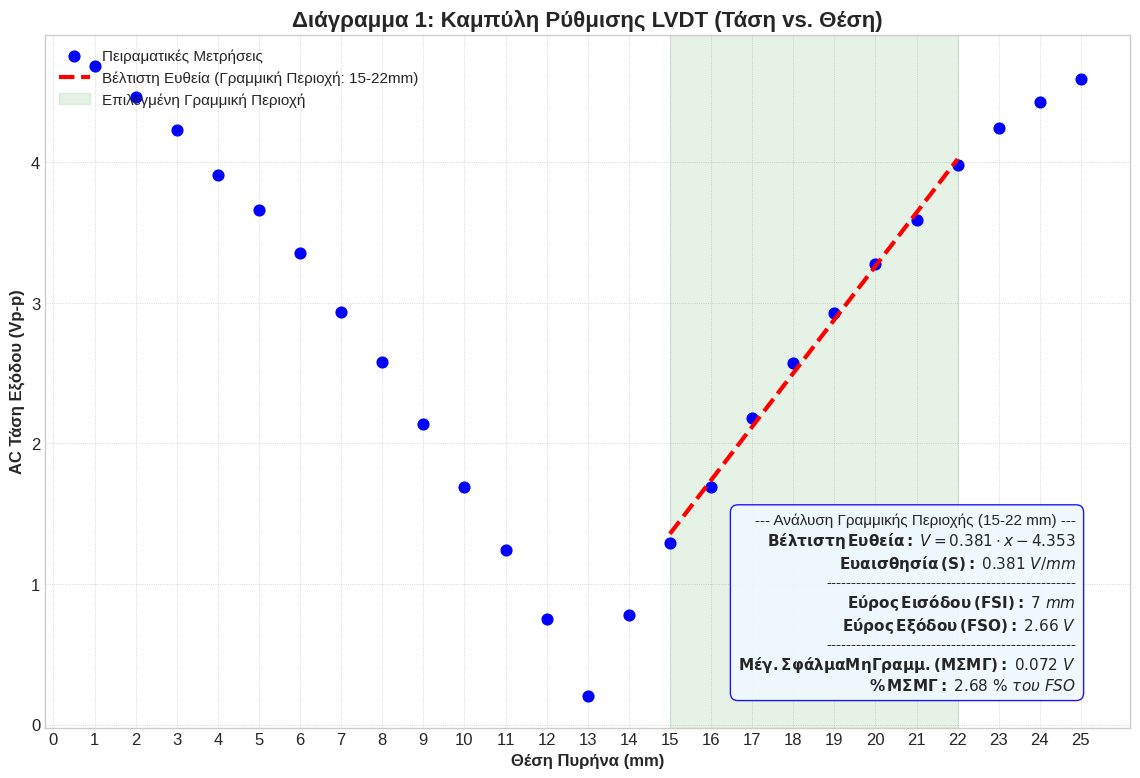

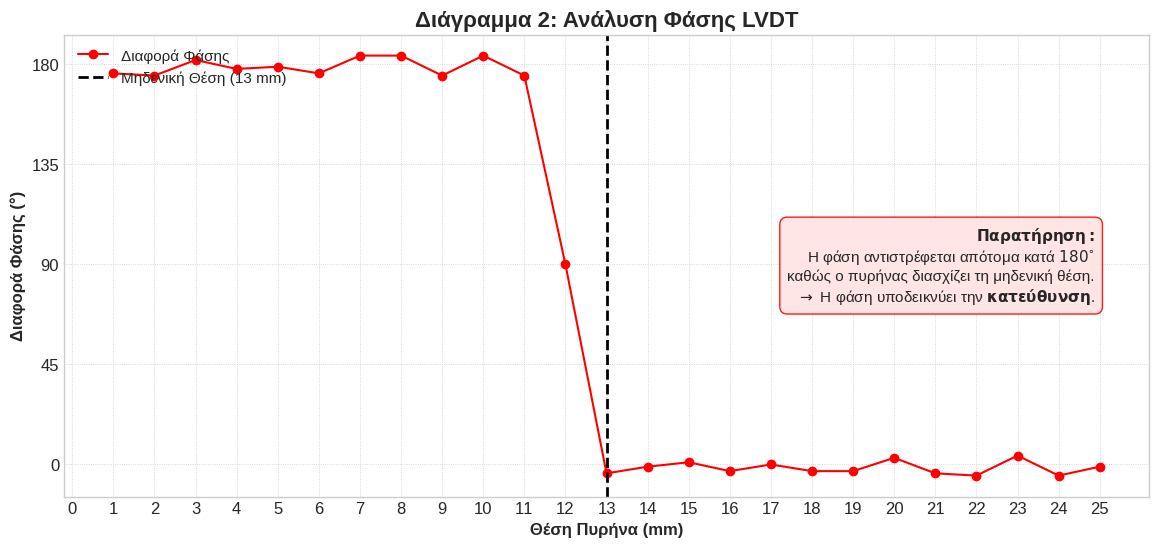

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# === Ρυθμίσεις για Όμορφες Γραφικές Παραστάσεις ===
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (12, 8),
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'figure.facecolor': 'white'
})

# ==============================================================
# ΜΕΡΟΣ 1: ΔΗΜΙΟΥΡΓΙΑ ΕΝΔΕΙΚΤΙΚΩΝ ΔΕΔΟΜΕΝΩΝ (ΠΙΝΑΚΑΣ 1)
# ==============================================================
# Δημιουργούμε ρεαλιστικά ενδεικτικά δεδομένα για το LVDT
# Η μηδενική θέση (null) είναι στο 13 mm
positions = np.arange(1, 26) # 1 έως 25 mm

# Ενδεικτικές τιμές Vp-p
# Δημιουργούμε μια "σπασμένη" γραμμή (V-shape) με κέντρο το 13
null_position = 13
sensitivity_slope = 0.55  # V/mm
null_voltage = 0.15 # Ιδανικά 0, αλλά πρακτικά ποτέ
noise = np.random.rand(len(positions)) * 0.1 # Τυχαίος θόρυβος

# Δημιουργία των τιμών Vp-p
voltages = null_voltage + np.abs(positions - null_position) * sensitivity_slope
# Προσθήκη μη-γραμμικότητας στα άκρα
non_linearity = -0.015 * (positions - null_position)**2
voltages = voltages + non_linearity + noise
voltages[voltages < null_voltage] = null_voltage # Διασφάλιση ότι δεν πέφτει κάτω από το null

# Ενδεικτικές τιμές Φάσης
phases = np.where(positions < null_position, 180, 0) # 180° αριστερά, 0° δεξιά
# Προσθήκη θορύβου/αβεβαιότητας στη φάση, ειδικά κοντά στο null
phases = phases + np.random.randint(-5, 5, len(positions))
phases[null_position - 2] = 90 # Αστάθεια φάσης ακριβώς στο null

# Δημιουργία του DataFrame
data = pd.DataFrame({
    'ΘΕΣΗ ΦΕΡΙΤΗ (mm)': positions,
    'AC ΤΑΣΗ ΕΞΟΔΟΥ (Vp-p)': voltages,
    'ΔΙΑΦΟΡΑ ΦΑΣΗΣ (°)': phases
})

print("--- Πίνακας 1: Ενδεικτικές Πειραματικές Μετρήσεις ---")
display(data.round(2).set_index('ΘΕΣΗ ΦΕΡΙΤΗ (mm)'))


# ==============================================================
# ΜΕΡΟΣ 2: ΔΙΑΓΡΑΜΜΑ 1 (ΤΑΝΣΗ vs ΘΕΣΗ) & ΑΝΑΛΥΣΗ
# ==============================================================

# --- 2.1 Υπολογισμοί Γραμμικής Παλινδρόμησης (Βήματα 10-16) ---

# Επιλέγουμε τη γραμμική περιοχή για ανάλυση (π.χ. από 15mm έως 22mm)
X1, X2 = 15, 22
linear_region = data[
    (data['ΘΕΣΗ ΦΕΡΙΤΗ (mm)'] >= X1) &
    (data['ΘΕΣΗ ΦΕΡΙΤΗ (mm)'] <= X2)
]

# Είσοδοι (x, y) για τη γραμμική παλινδρόμηση
x_linear = linear_region['ΘΕΣΗ ΦΕΡΙΤΗ (mm)']
y_linear = linear_region['AC ΤΑΣΗ ΕΞΟΔΟΥ (Vp-p)']

# Εκτέλεση γραμμικής παλινδρόμησης (y = S*x + b)
# S = slope (Ευαισθησία)
S_slope, intercept, r_value, p_value, std_err = stats.linregress(x_linear, y_linear)

# Υπολογισμός FSI (Full Scale Input)
FSI = X2 - X1

# Υπολογισμός FSO (Full Scale Output) από τη βέλτιστη ευθεία
V_at_X1 = S_slope * X1 + intercept
V_at_X2 = S_slope * X2 + intercept
FSO = V_at_X2 - V_at_X1

# Υπολογισμός ΜΣΜΓ (Μέγιστο Σφάλμα Μη Γραμμικότητας)
# Βρίσκουμε τις προβλεπόμενες τιμές (V_pred) από την ευθεία
V_pred = S_slope * x_linear + intercept
# Βρίσκουμε το σφάλμα (V_actual - V_pred)
error = y_linear - V_pred
# Το ΜΣΜΓ είναι η μέγιστη απόλυτη τιμή αυτού του σφάλματος
MSMG = np.max(np.abs(error))

# Υπολογισμός % ΜΣΜΓ
Percent_MSMG = (MSMG / FSO) * 100

# --- 2.2 Σχεδίαση Γραφήματος 1 ---
plt.figure(figsize=(14, 9))
ax1 = plt.gca()

# Σχεδίαση όλων των πειραματικών σημείων
ax1.scatter(data['ΘΕΣΗ ΦΕΡΙΤΗ (mm)'], data['AC ΤΑΣΗ ΕΞΟΔΟΥ (Vp-p)'],
            color='blue', marker='o', s=60, label='Πειραματικές Μετρήσεις', zorder=5)

# Σχεδίαση της "Βέλτιστης Ευθείας" μόνο στη γραμμική περιοχή
x_line_plot = np.array([X1, X2])
y_line_plot = S_slope * x_line_plot + intercept
ax1.plot(x_line_plot, y_line_plot,
         color='red', linestyle='--', linewidth=3, label=f'Βέλτιστη Ευθεία (Γραμμική Περιοχή: {X1}-{X2}mm)', zorder=6)

# Σκίαση της γραμμικής περιοχής
ax1.axvspan(X1, X2, color='green', alpha=0.1, label='Επιλεγμένη Γραμμική Περιοχή')

# --- 2.3 Προσθήκη Infobox με Αποτελέσματα ---
infobox_text = (
    f"--- Ανάλυση Γραμμικής Περιοχής ({X1}-{X2} mm) ---\n"
    r"$\mathbf{Βέλτιστη\,Ευθεία:}$" + f" $V = {S_slope:.3f} \cdot x - {np.abs(intercept):.3f}$\n"
    r"$\mathbf{Ευαισθησία\,(S):}$" + f" ${S_slope:.3f} \,\, V/mm$\n"
    f"--------------------------------------------------\n"
    r"$\mathbf{Εύρος\,Εισόδου\,(FSI):}$" + f" ${FSI:.0f} \,\, mm$\n"
    r"$\mathbf{Εύρος\,Εξόδου\,(FSO):}$" + f" ${FSO:.2f} \,\, V$\n"
    f"--------------------------------------------------\n"
    r"$\mathbf{Μέγ. Σφάλμα Μη Γραμμ. (ΜΣΜΓ):}$" + f" ${MSMG:.3f} \,\, V$\n"
    r"$\mathbf{\%\,ΜΣΜΓ:}$" + f" ${Percent_MSMG:.2f} \,\, \% \,\, του \,\, FSO$"
)

# Τοποθέτηση Infobox (κάτω δεξιά, σε κενή περιοχή)
ax1.text(0.95, 0.05, infobox_text,
         transform=ax1.transAxes,
         fontsize=11,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='b', alpha=0.9))

# --- 2.4 Τίτλοι και Ετικέτες ---
ax1.set_title('Διάγραμμα 1: Καμπύλη Ρύθμισης LVDT (Τάση vs. Θέση)', fontsize=16)
ax1.set_xlabel('Θέση Πυρήνα (mm)', fontsize=12)
ax1.set_ylabel('AC Τάση Εξόδου (Vp-p)', fontsize=12)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, which='both', linestyle=':', linewidth=0.6)
ax1.set_xticks(np.arange(0, 26, 1)) # Ευκρινείς ετικέτες ανά 1mm
plt.show()


# ==============================================================
# ΜΕΡΟΣ 3: ΔΙΑΓΡΑΜΜΑ 2 (ΦΑΣΗ vs ΘΕΣΗ) & ΑΝΑΛΥΣΗ
# ==============================================================

plt.figure(figsize=(14, 6))
ax2 = plt.gca()

# Σχεδίαση των σημείων της φάσης
ax2.plot(data['ΘΕΣΗ ΦΕΡΙΤΗ (mm)'], data['ΔΙΑΦΟΡΑ ΦΑΣΗΣ (°)'],
         marker='o', linestyle='-', color='red', label='Διαφορά Φάσης')

# Σχεδίαση κάθετης γραμμής στη μηδενική θέση
ax2.axvline(x=null_position, color='black', linestyle='--', linewidth=2,
            label=f'Μηδενική Θέση ({null_position} mm)')

# --- 3.1 Προσθήκη Infobox ---
phase_infobox_text = (
    r"$\mathbf{Παρατήρηση:}$" + "\n"
    "Η φάση αντιστρέφεται απότομα κατά $180^{\circ}$" + "\n"
    "καθώς ο πυρήνας διασχίζει τη μηδενική θέση." + "\n"
    r"$\rightarrow$ " + "Η φάση υποδεικνύει την $\mathbf{κατεύθυνση}$."
)

# Τοποθέτηση Infobox (κέντρο δεξιά)
ax2.text(0.95, 0.5, phase_infobox_text,
         transform=ax2.transAxes,
         fontsize=11,
         verticalalignment='center',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='mistyrose', ec='r', alpha=0.9))

# --- 3.2 Τίτλοι και Ετικέτες ---
ax2.set_title('Διάγραμμα 2: Ανάλυση Φάσης LVDT', fontsize=16)
ax2.set_xlabel('Θέση Πυρήνα (mm)', fontsize=12)
ax2.set_ylabel('Διαφορά Φάσης (°)', fontsize=12)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, which='both', linestyle=':', linewidth=0.6)
ax2.set_xticks(np.arange(0, 26, 1))
ax2.set_yticks([0, 45, 90, 135, 180])
plt.show()

--- Πίνακας 1: Ενδεικτικές Πειραματικές Μετρήσεις ---


<>:92: SyntaxWarning: invalid escape sequence '\c'
<>:93: SyntaxWarning: invalid escape sequence '\,'
<>:95: SyntaxWarning: invalid escape sequence '\,'
<>:96: SyntaxWarning: invalid escape sequence '\,'
<>:98: SyntaxWarning: invalid escape sequence '\,'
<>:99: SyntaxWarning: invalid escape sequence '\,'
<>:142: SyntaxWarning: invalid escape sequence '\c'
<>:144: SyntaxWarning: invalid escape sequence '\m'
<>:92: SyntaxWarning: invalid escape sequence '\c'
<>:93: SyntaxWarning: invalid escape sequence '\,'
<>:95: SyntaxWarning: invalid escape sequence '\,'
<>:96: SyntaxWarning: invalid escape sequence '\,'
<>:98: SyntaxWarning: invalid escape sequence '\,'
<>:99: SyntaxWarning: invalid escape sequence '\,'
<>:142: SyntaxWarning: invalid escape sequence '\c'
<>:144: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3354025625.py:92: SyntaxWarning: invalid escape sequence '\c'
  r"$\mathbf{Βέλτιστη\,Ευθεία:}$" + f" $V = {S_slope:.3f} \cdot x - {np.abs(intercept):.3f}$\n"
/tm

,AC ΤΑΣΗ ΕΞΟΔΟΥ (Vp-p),ΔΙΑΦΟΡΑ ΦΑΣΗΣ (°)
ΘΕΣΗ ΦΕΡΙΤΗ (mm),,
1,4.62,180
2,4.45,176
3,4.18,178
4,3.91,182
5,3.64,181
6,3.27,179
7,2.97,183
8,2.61,184
9,2.14,176


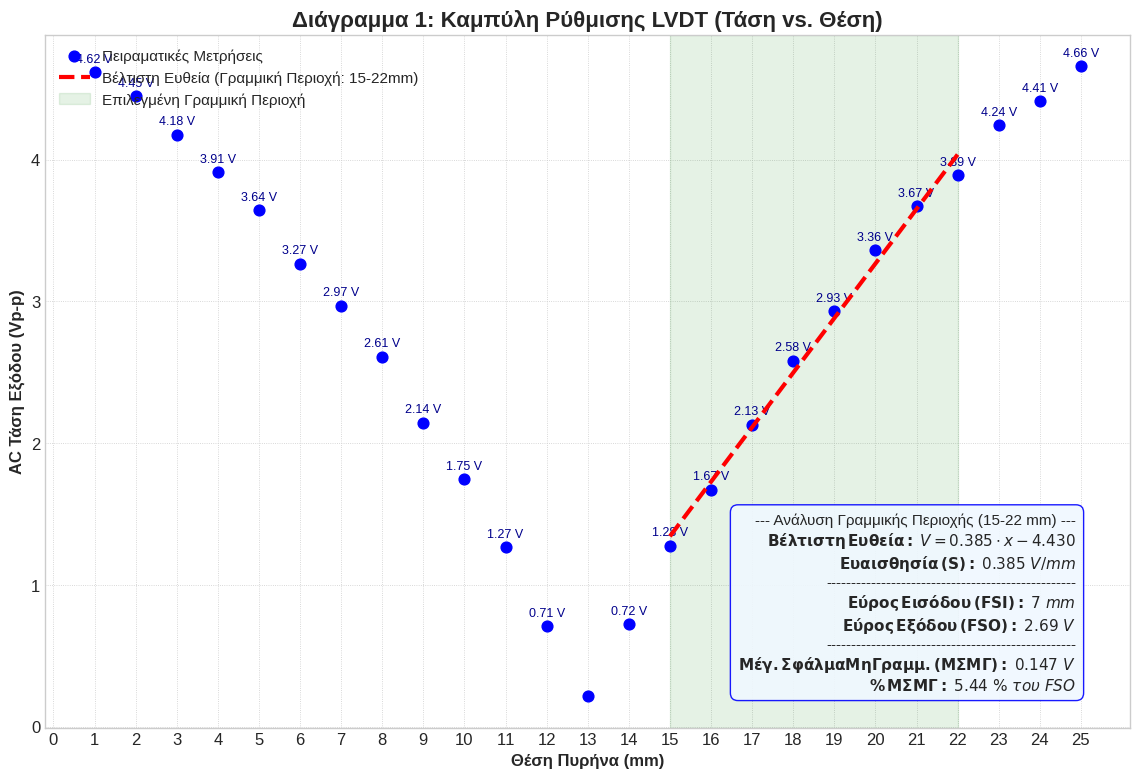

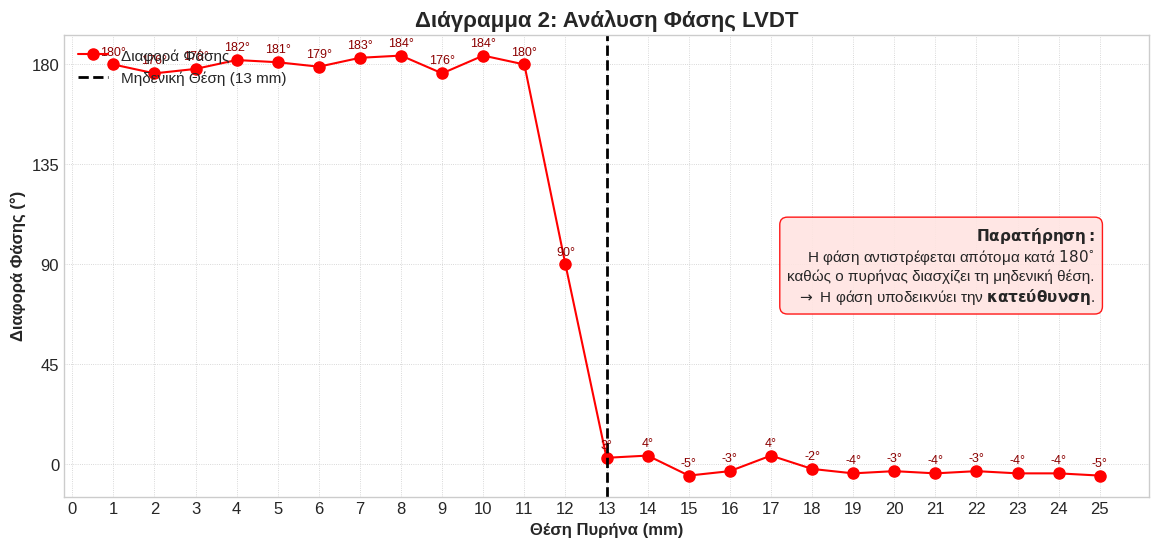

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# === Ρυθμίσεις για Όμορφες Γραφικές Παραστάσεις ===
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (12, 8),
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'figure.facecolor': 'white'
})

# ==============================================================
# ΜΕΡΟΣ 1: ΔΗΜΙΟΥΡΓΙΑ ΕΝΔΕΙΚΤΙΚΩΝ ΔΕΔΟΜΕΝΩΝ (ΠΙΝΑΚΑΣ 1)
# ==============================================================
positions = np.arange(1, 26) # 1 έως 25 mm
null_position = 13
sensitivity_slope = 0.55  # V/mm
null_voltage = 0.15 # Ιδανικά 0, αλλά πρακτικά ποτέ
noise = np.random.rand(len(positions)) * 0.1 # Τυχαίος θόρυβος
voltages = null_voltage + np.abs(positions - null_position) * sensitivity_slope
non_linearity = -0.015 * (positions - null_position)**2
voltages = voltages + non_linearity + noise
voltages[voltages < null_voltage] = null_voltage
phases = np.where(positions < null_position, 180, 0)
phases = phases + np.random.randint(-5, 5, len(positions))
phases[null_position - 2] = 90

data = pd.DataFrame({
    'ΘΕΣΗ ΦΕΡΙΤΗ (mm)': positions,
    'AC ΤΑΣΗ ΕΞΟΔΟΥ (Vp-p)': voltages,
    'ΔΙΑΦΟΡΑ ΦΑΣΗΣ (°)': phases
})

print("--- Πίνακας 1: Ενδεικτικές Πειραματικές Μετρήσεις ---")
display(data.round(2).set_index('ΘΕΣΗ ΦΕΡΙΤΗ (mm)'))


# ==============================================================
# ΜΕΡΟΣ 2: ΔΙΑΓΡΑΜΜΑ 1 (ΤΑΝΣΗ vs ΘΕΣΗ) & ΑΝΑΛΥΣΗ
# ==============================================================

# --- 2.1 Υπολογισμοί Γραμμικής Παλινδρόμησης (Βήματα 10-16) ---
X1, X2 = 15, 22
linear_region = data[
    (data['ΘΕΣΗ ΦΕΡΙΤΗ (mm)'] >= X1) &
    (data['ΘΕΣΗ ΦΕΡΙΤΗ (mm)'] <= X2)
]
x_linear = linear_region['ΘΕΣΗ ΦΕΡΙΤΗ (mm)']
y_linear = linear_region['AC ΤΑΣΗ ΕΞΟΔΟΥ (Vp-p)']
S_slope, intercept, r_value, p_value, std_err = stats.linregress(x_linear, y_linear)
FSI = X2 - X1
V_at_X1 = S_slope * X1 + intercept
V_at_X2 = S_slope * X2 + intercept
FSO = V_at_X2 - V_at_X1
V_pred = S_slope * x_linear + intercept
error = y_linear - V_pred
MSMG = np.max(np.abs(error))
Percent_MSMG = (MSMG / FSO) * 100

# --- 2.2 Σχεδίαση Γραφήματος 1 ---
plt.figure(figsize=(14, 9))
ax1 = plt.gca()

# Σχεδίαση όλων των πειραματικών σημείων
ax1.scatter(data['ΘΕΣΗ ΦΕΡΙΤΗ (mm)'], data['AC ΤΑΣΗ ΕΞΟΔΟΥ (Vp-p)'],
            color='blue', marker='o', s=60, label='Πειραματικές Μετρήσεις', zorder=5)

# --- ΝΕΟ: Προσθήκη ετικετών (annotations) ---
for i, row in data.iterrows():
    # Μόνο εάν η ετικέτα δεν είναι πολύ κοντά στο κέντρο (για να αποφύγουμε την επικάλυψη)
    if np.abs(row['ΘΕΣΗ ΦΕΡΙΤΗ (mm)'] - null_position) > 0.5:
        ax1.text(row['ΘΕΣΗ ΦΕΡΙΤΗ (mm)'], row['AC ΤΑΣΗ ΕΞΟΔΟΥ (Vp-p)'] + 0.05,
                 f"{row['AC ΤΑΣΗ ΕΞΟΔΟΥ (Vp-p)']:.2f} V",
                 fontsize=9, color='darkblue', ha='center', va='bottom')

# Σχεδίαση της "Βέλτιστης Ευθείας"
x_line_plot = np.array([X1, X2])
y_line_plot = S_slope * x_line_plot + intercept
ax1.plot(x_line_plot, y_line_plot,
         color='red', linestyle='--', linewidth=3, label=f'Βέλτιστη Ευθεία (Γραμμική Περιοχή: {X1}-{X2}mm)', zorder=6)

# Σκίαση της γραμμικής περιοχής
ax1.axvspan(X1, X2, color='green', alpha=0.1, label='Επιλεγμένη Γραμμική Περιοχή')

# --- 2.3 Προσθήκη Infobox με Αποτελέσματα ---
infobox_text = (
    f"--- Ανάλυση Γραμμικής Περιοχής ({X1}-{X2} mm) ---\n"
    r"$\mathbf{Βέλτιστη\,Ευθεία:}$" + f" $V = {S_slope:.3f} \cdot x - {np.abs(intercept):.3f}$\n"
    r"$\mathbf{Ευαισθησία\,(S):}$" + f" ${S_slope:.3f} \,\, V/mm$\n"
    f"--------------------------------------------------\n"
    r"$\mathbf{Εύρος\,Εισόδου\,(FSI):}$" + f" ${FSI:.0f} \,\, mm$\n"
    r"$\mathbf{Εύρος\,Εξόδου\,(FSO):}$" + f" ${FSO:.2f} \,\, V$\n"
    f"--------------------------------------------------\n"
    r"$\mathbf{Μέγ. Σφάλμα Μη Γραμμ. (ΜΣΜΓ):}$" + f" ${MSMG:.3f} \,\, V$\n"
    r"$\mathbf{\%\,ΜΣΜΓ:}$" + f" ${Percent_MSMG:.2f} \,\, \% \,\, του \,\, FSO$"
)
ax1.text(0.95, 0.05, infobox_text,
         transform=ax1.transAxes,
         fontsize=11,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='b', alpha=0.9))

# --- 2.4 Τίτλοι και Ετικέτες ---
ax1.set_title('Διάγραμμα 1: Καμπύλη Ρύθμισης LVDT (Τάση vs. Θέση)', fontsize=16)
ax1.set_xlabel('Θέση Πυρήνα (mm)', fontsize=12)
ax1.set_ylabel('AC Τάση Εξόδου (Vp-p)', fontsize=12)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, which='both', linestyle=':', linewidth=0.6)
ax1.set_xticks(np.arange(0, 26, 1))
plt.show()


# ==============================================================
# ΜΕΡΟΣ 3: ΔΙΑΓΡΑΜΜΑ 2 (ΦΑΣΗ vs ΘΕΣΗ) & ΑΝΑΛΥΣΗ
# ==============================================================

plt.figure(figsize=(14, 6))
ax2 = plt.gca()

# Σχεδίαση των σημείων της φάσης
ax2.plot(data['ΘΕΣΗ ΦΕΡΙΤΗ (mm)'], data['ΔΙΑΦΟΡΑ ΦΑΣΗΣ (°)'],
         marker='o', markersize=8, linestyle='-', color='red', label='Διαφορά Φάσης')

# --- ΝΕΟ: Προσθήκη ετικετών (annotations) ---
for i, row in data.iterrows():
    ax2.text(row['ΘΕΣΗ ΦΕΡΙΤΗ (mm)'], row['ΔΙΑΦΟΡΑ ΦΑΣΗΣ (°)'] + 3,
             f"{row['ΔΙΑΦΟΡΑ ΦΑΣΗΣ (°)']:.0f}°",
             fontsize=9, color='darkred', ha='center', va='bottom')

# Σχεδίαση κάθετης γραμμής στη μηδενική θέση
ax2.axvline(x=null_position, color='black', linestyle='--', linewidth=2,
            label=f'Μηδενική Θέση ({null_position} mm)')

# --- 3.1 Προσθήκη Infobox ---
phase_infobox_text = (
    r"$\mathbf{Παρατήρηση:}$" + "\n"
    "Η φάση αντιστρέφεται απότομα κατά $180^{\circ}$" + "\n"
    "καθώς ο πυρήνας διασχίζει τη μηδενική θέση." + "\n"
    r"$\rightarrow$ " + "Η φάση υποδεικνύει την $\mathbf{κατεύθυνση}$."
)
ax2.text(0.95, 0.5, phase_infobox_text,
         transform=ax2.transAxes,
         fontsize=11,
         verticalalignment='center',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='mistyrose', ec='r', alpha=0.9))

# --- 3.2 Τίτλοι και Ετικέτες ---
ax2.set_title('Διάγραμμα 2: Ανάλυση Φάσης LVDT', fontsize=16)
ax2.set_xlabel('Θέση Πυρήνα (mm)', fontsize=12)
ax2.set_ylabel('Διαφορά Φάσης (°)', fontsize=12)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, which='both', linestyle=':', linewidth=0.6)
ax2.set_xticks(np.arange(0, 26, 1))
ax2.set_yticks([0, 45, 90, 135, 180])
plt.show()